In [2]:
%matplotlib inline
from PIL import Image
import numpy as np
from numpy import *
from sklearn import preprocessing as prep
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt
import sklearn.cross_validation as crval
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_mldata
from scipy.interpolate import interp1d
from sklearn.svm import LinearSVC
import pylab
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.mixture import GMM
from sklearn.neighbors import KernelDensity
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import svm
import csv
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

X=[]
with open('density_data.csv','r') as f:
    reader = csv.reader(f)
    for row1 in reader:
        X.append(row1)
print size(X)

X=np.asarray(X)
X=X[:,1:15]

print X.shape

X=X.astype(np.float)


X=np.ravel(X)
X= X.reshape(5000, 14)
print(shape(X))

selX=X

selX_scaled=X
std_scal=prep.StandardScaler()
selX_scaled=std_scal.fit_transform(selX)
print('it had mean: ' +str(mean(selX))+' and std:'+ str(std(selX)))
print('NOW it has mean: '+str(mean(selX_scaled))+' and std: '+str(std(selX_scaled)))

#selX_scaled=X


#for clusters in range(3,3, 3):
#kmeans = KMeans(n_clusters=20, random_state=0).fit(X)   

#cluster_labels= kmeans.score(X)



#print('done')
#print cluster_labels

75000
(5000, 14)
(5000, 14)
it had mean: 0.189320842874 and std:2.26790054052
NOW it has mean: 4.3038588566e-17 and std: 1.0


In [3]:
def write_answers(predictions, description):
    fp=open(description+'.txt','w')
    fp.write('Point_ID,Output\n')
    i=1
    for a in predictions:
        fp.write(str(i)+','+str(a)+'\n')
        i+=1
    fp.close()


# Dimensionality reduction

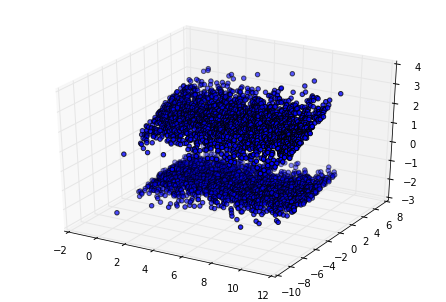

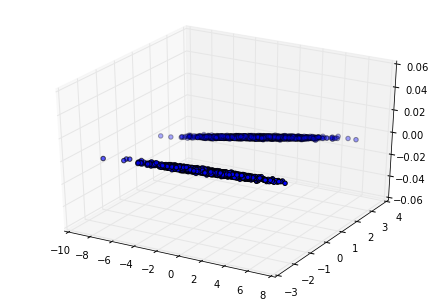

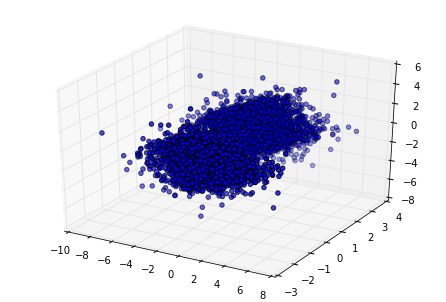

In [4]:
X=selX_scaled
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)

pca.n_components = 3
X_reduced = pca.fit_transform(X)

Xpca=X_reduced[:,0]
Ypca=X_reduced[:,1]
Zpca=X_reduced[:,2]

fig = pylab.figure()
ax = Axes3D(fig)
x=linspace(0,10,5000)
XX=x
ax.scatter(XX, Xpca, Ypca)

fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(Xpca, Ypca)


fig = pylab.figure()
ax = Axes3D(fig)
x=linspace(0,10,5000)
XX=x
ax.scatter(Xpca, Ypca, Zpca)



# K-means clustering

In [ ]:
init=np.random.randint(1)
centroids=[]
kmeans = KMeans(n_clusters=2, random_state=init).fit(X_reduced)
print kmeans.cluster_centers_
centroids=kmeans.cluster_centers_
print centroids[0]
fig = pylab.figure()
ax = Axes3D(fig)
x=linspace(0,10,5000)
XX=x

ax = plt.gca()

ax.scatter(Xpca, Ypca, Zpca, zorder=0.3)
ax.hold(True)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], color='y', s=5000, zorder=0.5)


# BIC search for the number of components

In [ ]:
old_mean=0;
old_bic=1000000
clusters=1
curr_bic=631209
# reduced or not reduced data?
#X_reduced=X
while curr_bic<old_bic:
    old_bic=curr_bic
    

   
    clusterer=GMM(clusters, 'full')
    gmm_model=clusterer.fit(X_reduced)
    cluster_labels_l= gmm_model.score(X_reduced)

    means=gmm_model.means_

    print 'Bic for '+str(clusters)+ ' components: '+str(gmm_model.bic(X_reduced))
    curr_bic=gmm_model.bic(X_reduced)
    clusters+=1

fig = pylab.figure()
ax = Axes3D(fig)
x=linspace(0,10,5000)
XX=x

ax = plt.gca()
ax.scatter(Xpca, Ypca, Zpca, zorder=0.3)
ax.hold(True)
ax.scatter(means[:,0], means[:,1], means[:,2], color='green', s=5000, zorder=0.5)


Best output is 6 in both cases

# Gaussian Mixture Models

In [ ]:
print X_reduced.shape
for components in range(1,148, 4):
    print 'Number of components: '+str(components)
    clusterer=GMM(components, 'full')
    gmm_model=clusterer.fit(X_reduced)
    cluster_labels_l= gmm_model.score(X_reduced)
    print cluster_labels_l[0:3]
    #predictions=gmm_model.predict(X_reduced)

    print sum(cluster_labels_l)

In [ ]:
components=7
print 'Number of components: '+str(components)
clusterer=GMM(components, 'full')
gmm_model=clusterer.fit(X_reduced)
cluster_labels_l= gmm_model.score(X_reduced)
print cluster_labels_l[0:3]
#predictions=gmm_model.predict(X_reduced)

print sum(cluster_labels_l)

# ISOMAP dimensionality reduction

In [ ]:
from sklearn import manifold

# learning the manifold

n_neighbors=20
X_reduced_iso = manifold.Isomap(n_neighbors, n_components=3).fit_transform(X).T

In [ ]:
# 3D visualization
X_iso=trans_data[0,:]
Y_iso=trans_data[1,:]
Z_iso=trans_data[2,:]

fig = pylab.figure()
ax = Axes3D(fig)
x=linspace(0,10,5000)

ax = plt.gca()
ax.scatter(X_iso, Y_iso, Z_iso, zorder=0.3)

#ax = fig.add_subplot(257)
#plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
#plt.title("%s (%.2g sec)" % ('Isomap', t1 - t0))
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
#plt.axis('tight')

# Kernel Density Estimation

In [ ]:
values=X_reduced
kde = stats.gaussian_kde(values)
density = kde(values)


In [ ]:
print density
#fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
#x, y, z = values
#ax.scatter(x, y, z, c=density)
#plt.show()

In [1]:
import statsmodels.api as sm
print X_reduced.shape

var_type_desc='cccccccccccccc'
dens_u = sm.nonparametric.KDEMultivariate(data=X,var_type=var_type_desc, bw='normal_reference')
dens_u.bw


NameError: name 'X_reduced' is not defined

In [ ]:
kde_predictions=dens_u.pdf(X)

In [ ]:
write_answers(kde_predictions, 'kde_predictions_4th_attempt_scaled_data')

# Bayesian Gaussian Mixture Models

In [5]:
from sklearn.mixture import BayesianGaussianMixture


ImportError: cannot import name BayesianGaussianMixture

# Random Stuff

In [ ]:
from sklearn.mixture import VBGMM

clusters=1
random_state=0
clusterer= VBGMM(
        n_components=2 * clusters,init_params='random',      
        random_state=random_state)
clusterer.fit(selX_scaled)
cluster_labels= clusterer.score(selX_scaled)
print cluster_labels

In [ ]:
from functools import partial
x2=Xpca

fig1 = plt.figure(figsize=(12, 10))
ax = fig1.add_subplot(111)
actual=cluster_labels
new=cluster_labels_l
ax.plot(actual, 'r--', label="Actual PDF")
ax.plot(new, 'b--', label="new PDF")

plot(np.absolute(x), 'g-', label="abs")

ax.legend(loc=2)
ax.set_xlabel('x')
ax.set_ylabel('Density Estimate')
#     plt.savefig(cwd+"/Plots/KDE_"+name+".png")


In [ ]:
Y=cluster_assgn=clusterer.predict(X_reduced)
print Y
print X_reduced.size
plt.scatter(XX,Y)

#for i in range (0,5000):
#    if (kpred[i])==0:
#        Xpca_one.append(Xpca[i])
#        Xpca_one_ii.append(i)
#        Ypca_one.append(Ypca[i])
#        #Ypca_one_ii.append(i)
#        plt.scatter(Xpca[i], Ypca[i])
#    else:
#        Xpca_two.append(Xpca[i])
#        Xpca_two_ii.append(i)
#        Ypca_two.append(Ypca[i])
#        #Ypca_two_ii.append(i)
#        plt.scatter(XX[i],kpred[i])

In [ ]:
lr = linear_model.LinearRegression()
n=len(Xpca_one)

#print n
lr.fit((np.asarray(Xpca_one)).reshape(1,n), (np.asarray(Ypca_one)).reshape(1,n))  # x needs to be 2d for LinearRegression
plt.scatter(Xpca_one, lr.predict(Xpca_one).reshape(n,1))

ll=lr.predict(Xpca_one)
print shape(l1)
lr = linear_model.LinearRegression()
n=len(Xpca_two)

print n
lr.fit((np.asarray(Xpca_two)).reshape(1,n), (np.asarray(Ypca_two)).reshape(1,n))  # x needs to be 2d for LinearRegression
plt.scatter(Xpca_two, lr.predict(Xpca_two).reshape(n,1))
print shape(lr.predict(Xpca_two))
lll=lr.predict(Xpca_two)

In [ ]:
factor = FactorAnalysis(n_components=4, , random_state=101).fit(X)


In [ ]:
print ll[0,2462]
#print Xpca_two_ii
#print lr.predict(Xpca_two)
#print Xpca_one_ii
predictions=np.zeros(5000)

counter=0
for i in Xpca_one_ii:
    predictions[i]=ll[0,counter]
    counter+=1
    

count=0
for i in Xpca_two_ii:
    #print i
    predictions[i]=lll[0,count]
    count+=1

In [ ]:
print predictions

In [ ]:
predictions=cluster_labels_l
fp=open('answers.txt','w')
fp.write('Point_ID,Output\n')
i=1
for a in predictions:
    fp.write(str(i)+','+str(a)+'\n')
    i+=1
fp.close()
    

In [ ]:
clusters=8
clusterer=GMM(clusters, 'full')
clusterer.fit(selX_scaled)
cluster_labels= clusterer.score(selX_scaled)


In [ ]:
print cluster_labels

In [ ]:
fp=open('answers.txt','w')
fp.write('Point_ID,Output\n')
i=1
for a in cluster_labels:
    fp.write(str(i)+','+str(a)+'\n')
    i+=1
fp.close()

In [ ]:
plt.scatter(selX_scaled[:,1], cluster_labels)
